In [1]:
import os

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
%reload_ext importnb
import GANstructure

Using TensorFlow backend.


In [5]:
path='../data/camel/full_numpy_bitmap_camel.npy'

In [6]:
RUN_FOLDER='run/'
if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER,'images'))
    os.mkdir(os.path.join(RUN_FOLDER,'weights'))

In [7]:
def loader(path):
    dataset_size=5000
    dataset=np.load(path)
    no_of_images=dataset.shape[0]
    dataset=dataset.reshape(no_of_images,28,28,1)
    dataset=dataset[:dataset_size]
    dataset = dataset.astype('float32') / 255.0
    '''
    test 1
    arr = np.arange(10)
    np.random.shuffle(arr)
    print(arr)
    '''
    np.random.shuffle(dataset)
   
    return dataset

In [8]:
x=loader(path)
x=np.squeeze(x)

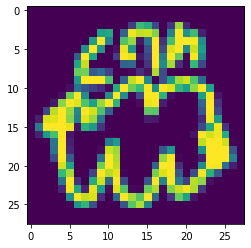

In [9]:
plt.imshow(x[50])
plt.show()

In [10]:
gan = GANstructure.GAN(input_dims = (28,28,1)
        , discriminator_conv_filters = [64,64,128,128]
        , discriminator_conv_kernel_size = [5,5,5,5]
        , discriminator_conv_strides = [2,2,2,1]
        , discriminator_activation = 'relu'
        , discriminator_dropout = 0.4
        , discriminator_lr = 0.0008
        , generator_initial_dense_layer_size = (7, 7, 64)
        , generator_upsample = [2,2,1,1]
        , generator_conv_filters = [128,64, 64,1]
        , generator_conv_kernel_size = [5,5,5,5]
        , generator_conv_strides = [1,1, 1, 1]
        , generator_activation = 'relu'
        , generator_dropout = None
        , generator_lr = 0.0004
        , optimizer = 'rmsprop'
        , latent_dims = 100
        )

In [11]:
gan.discriminator.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
discriminator_input (InputLa (None, 28, 28, 1)         0         
_________________________________________________________________
discriminator_layer_0 (Conv2 (None, 14, 14, 64)        1664      
_________________________________________________________________
activation_1 (Activation)    (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
discriminator_layer_1 (Conv2 (None, 7, 7, 64)          102464    
_________________________________________________________________
activation_2 (Activation)    (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 64)          0   

In [12]:
gan.generator.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
generator_input (InputLayer) (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 3136)              316736    
_________________________________________________________________
activation_5 (Activation)    (None, 3136)              0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 64)          0         
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 14, 14, 64)        0         
_________________________________________________________________
generator_layer_0 (Conv2D)   (None, 14, 14, 128)       204928    
_________________________________________________________________
activation_6 (Activation)    (None, 14, 14, 128)       0   

In [13]:
BATCH_SIZE = 64
EPOCHS = 6000
PRINT_EVERY_N_BATCHES = 5

In [14]:
dataset=loader(path)

In [15]:
x_train=dataset[:4000]

In [16]:
gan.train(x_train, batch_size = BATCH_SIZE, epochs = EPOCHS, run_folder = RUN_FOLDER, 
          print_every_n_batch = PRINT_EVERY_N_BATCHES
)



NameError: name 'latent_dims' is not defined